In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

classifier = Sequential()
# 4 conv and pooling layers
classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same', name='conv1'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

# fcl
classifier.add(Dense(units=128, activation='relu', name='fcl'))
classifier.add(Dense(units=1, activation='sigmoid', name='output'))

# logging the initiated random kernels from first conv layer 
def log_initial_kernels(model):
    for layer in model.layers:
        if layer.name == 'conv1':
            kernels, biases = layer.get_weights()
            print(f"Layer {layer.name} initial kernels:")
            for i in range(kernels.shape[-1]):
                kernel_matrix = kernels[:, :, :, i]
                print(f"Kernel {i+1}:\n{kernel_matrix}\n")

log_initial_kernels(classifier)

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\probi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Layer conv1 initial kernels:
Kernel 1:
[[[ 0.12814112 -0.01118122 -0.12862495]
  [ 0.09763443 -0.05702075 -0.12510094]
  [-0.04829039  0.10937171 -0.07156784]]

 [[ 0.13170548 -0.08801508  0.06362793]
  [-0.03417917  0.01348604  0.02995434]
  [ 0.10457976  0.12470229  0.09706178]]

 [[-0.12424906 -0.0503895   0.05465817]
  [-0.11587     0.03765725 -0.11620796]
  [ 0.05999388 -0.06219814 -0.06716112]]]

Kernel 2:
[[[ 0.1111545  -0.0727402  -0.00928879]
  [-0.07790141  0.13103323 -0.0516153 ]
  [-0.1154728  -0.0306304  -0.13049914]]

 [[ 0.11721875  0.01444636  0.10596263]
  [ 0.00389186 -0.0428241   0.13619475]
  [-0.10069235  0.12461682  0.11892565]]

 [[ 0.09130657  0.04128204  0.03158332]
  [ 0.04309294 -0.04632653 -0.02123168]
  [-0.04680168  0.13319348 -0.00935259]]]

Kernel 3:
[[[ 0.04856363  0.03629455  0.11901201]
  [-0.03181002 -0.04880434  0.08204831]
  [ 0.07157294 -0.05692414  0.04673336]]

 [[ 0.04970646 -0.0555575  -0.05554204]
  [ 0.11040896 -0.01889527 -0.04306223]
  [-0

In [36]:
# Image preprocessing-fitting the CNN to image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# datagen doesnt regenerate images from the original data
training_set = train_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Train',
                                                 target_size=(128, 128),
                                                 batch_size=9,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Test',
                                             target_size=(128, 128),
                                             batch_size=9,
                                             class_mode='binary')

history = classifier.fit(training_set,
                          steps_per_epoch=575,
                          epochs=5,
                          validation_data=test_set,
                          validation_steps=119)

# history = classifier.fit(training_set,
#                        steps_per_epoch=len(training_set),
#                        epochs=10,  
#                        validation_data=test_set,
#                        validation_steps=len(test_set),
#                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

model_save_path = r'C:\Users\probi\Downloads\Naani\model.h5'
classifier.save(model_save_path)

print("Model saved successfully at:", model_save_path)

ValueError: Unrecognized data type: x=C:\Users\probi\Downloads\Naani\test.png (of type <class 'str'>)

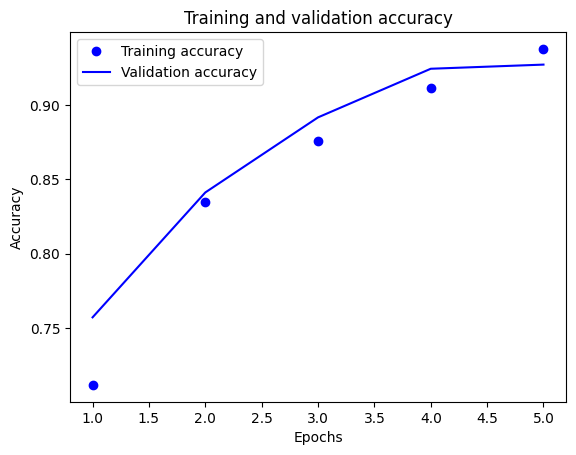

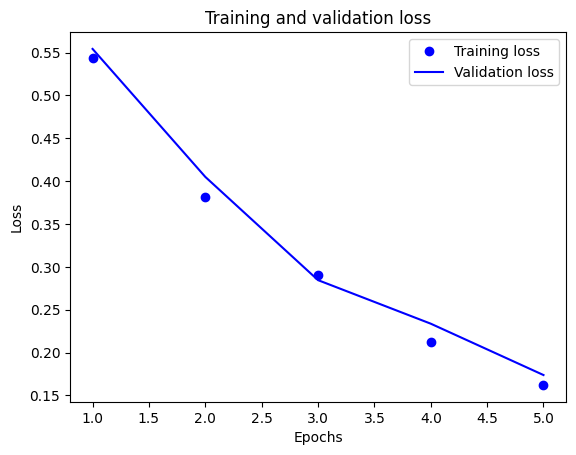

In [6]:
import matplotlib.pyplot as plt

# accuracy graprh
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss graphh
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

model_path = r'C:\Users\probi\Downloads\Naani\model.h5'
model = load_model(model_path)
#TODO: preprocess the image.

test_image_path = r'C:\Users\probi\Downloads\Naani\test.png'  
test_image = image.load_img(test_image_path, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255. 

prediction = model.predict(test_image)

if prediction[0][0] > 0.5:
    result = 'normal'
else:
    result = 'cataract'

print("Prediction:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: normal
